# Using the IEM Query module

In [23]:
root_path = '../'
# Adds the repo's root to the list of paths
import sys
sys.path.append(root_path)
# Utilities package
from src.common import utils
from src.data import iem_query
from src.models import weather as weather_models
from src.frontend import plotter
import yaml
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from IPython.display import clear_output

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

flight_data_dir = '../data/flight/'
weather_data_dir = '../data/weather/'

flight_data_dir = os.path.normpath(flight_data_dir)
weather_data_dir = os.path.normpath(weather_data_dir)


config_dir = os.path.join(root_path, 'config', 'config_template.yml')
# From here we load the config file
with open(config_dir, 'r', encoding='utf8') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)
    
def clear():
    clear_output(wait=True)

logger = utils.Logger(config, clear_function=clear)
pltr = plotter.Plotter(config)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading all stations and station properties

In [6]:
iem_querier = iem_query.Querier(config, logger=logger)
stations = iem_querier.load_all_station_properties(filter_by_date=True)
stations = stations.sort_values(by='id')

2023/10/31 13:28:20 : Computing stations sigma


## Loading data for a particular station in a date range

In [9]:
station_data = iem_querier.query_station_data(stations.sample(1).iloc[0])
station_data.columns

2023/10/31 13:28:50 : Requesting data for station MGN on base-url: http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?data=all&tz=Etc/UTC&format=comma&latlon=yes&year1=2022&month1=12&day1=31&year2=2023&month2=01&day2=01&


Index(['timestamp', 'lon', 'lat', 'tmpf', 'relh', 'drct', 'sknt', 'p01i',
       'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4',
       'ice_accretion_1hr', 'smps', 'sknt_E', 'sknt_N', 'smps_E', 'smps_N',
       'tmpc', 'elevation', 'sigma', 'station', 'valid', 'skyc1', 'skyc2',
       'wxcodes', 'metar'],
      dtype='object')

## Loading data for multiple stations

In [10]:
all_stations_data = iem_querier.query_multiple_station_data(stations.sample(10), clean_data=True, interpolate_data=True)
all_stations_data

2023/10/31 14:43:52 : Requesting data for station DWH on base-url: http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?data=all&tz=Etc/UTC&format=comma&latlon=yes&year1=2022&month1=12&day1=31&year2=2023&month2=01&day2=01&


,timestamp,station,valid,lon,lat,tmpf,relh,drct,sknt,p01i,...,ice_accretion_1hr,metar,smps,sknt_E,sknt_N,smps_E,smps_N,tmpc,elevation,sigma
0,1672444800,PIL,2022-12-31 00:00,-97.3378,26.1597,66.0,96.240000,20.0,5.0,0.0,...,NaN,KPIL 310000Z AUTO 02005KT 8SM CLR 20/18 A2990 ...,2.572220,1.710101e+00,4.698463,8.797511e-01,2.417096,18.888889,6.0,59730.110112
1,1672445100,PIL,2022-12-31 00:05,-97.3378,26.1597,66.0,96.240000,20.0,5.0,0.0,...,NaN,KPIL 310005Z AUTO 02005KT 8SM CLR 20/18 A2990 ...,2.572220,1.710101e+00,4.698463,8.797511e-01,2.417096,18.888889,6.0,59730.110112
2,1672445400,PIL,2022-12-31 00:10,-97.3378,26.1597,66.0,96.240000,50.0,4.0,0.0,...,NaN,KPIL 310010Z AUTO 05004KT 7SM CLR 20/18 A2990 ...,2.057776,3.064178e+00,2.571150,1.576348e+00,1.322713,18.888889,6.0,59730.110112
3,1672445700,PIL,2022-12-31 00:15,-97.3378,26.1597,66.0,96.240000,40.0,5.0,0.0,...,NaN,KPIL 310015Z AUTO 04005KT 7SM CLR 20/18 A2990 ...,2.572220,3.213938e+00,3.830222,1.653391e+00,1.970435,18.888889,6.0,59730.110112
4,1672446000,PIL,2022-12-31 00:20,-97.3378,26.1597,66.0,96.240000,60.0,4.0,0.0,...,NaN,KPIL 310020Z AUTO 06004KT 7SM CLR 19/18 A2990 ...,2.057776,3.464102e+00,2.000000,1.782086e+00,1.028888,18.888889,6.0,59730.110112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,1672530000,DWH,2022-12-31 23:40,-95.5562,30.0680,69.3,49.771333,180.0,4.0,0.0,...,NaN,KDWH 312340Z AUTO 18004KT 10SM CLR 21/10 A2990...,2.057776,4.898587e-16,-4.000000,2.520049e-16,-2.057776,20.722222,46.0,38457.125315
1936,1672530300,DWH,2022-12-31 23:45,-95.5562,30.0680,68.8,50.824667,180.0,4.0,0.0,...,NaN,KDWH 312345Z AUTO 18004KT 10SM CLR 20/10 A2990...,2.057776,4.898587e-16,-4.000000,2.520049e-16,-2.057776,20.444444,46.0,38457.125315
1937,1672530600,DWH,2022-12-31 23:50,-95.5562,30.0680,68.3,51.878000,190.0,4.0,0.0,...,NaN,KDWH 312350Z AUTO 19004KT 10SM CLR 20/10 A2990...,2.057776,-6.945927e-01,-3.939231,-3.573291e-01,-2.026514,20.166667,46.0,38457.125315
1938,1672530780,DWH,2022-12-31 23:53,-95.5562,30.0680,68.0,52.510000,190.0,4.0,0.0,...,NaN,KDWH 312353Z 19004KT 10SM CLR 20/10 A2990 RMK ...,2.057776,-6.945927e-01,-3.939231,-3.573291e-01,-2.026514,20.000000,46.0,38457.125315


## Interpolating and Modeling Weather Data

In [18]:
all_stations_data = weather_models.calibrate_stations(all_stations_data, config)
all_stations_data[['elevation', 'sknt_E', 'sknt_N', 'tmpf', 'tmpf_sea_level', 'sknt_E_sea_level', 'sknt_N_sea_level']]

,elevation,sknt_E,sknt_N,tmpf,tmpf_sea_level,sknt_E_sea_level,sknt_N_sea_level
0,6.0,1.710101e+00,4.698463,66.0,66.0702,1.590101,1.590101
1,6.0,1.710101e+00,4.698463,66.0,66.0702,1.590101,1.590101
2,6.0,3.064178e+00,2.571150,66.0,66.0702,2.944178,2.944178
3,6.0,3.213938e+00,3.830222,66.0,66.0702,3.093938,3.093938
4,6.0,3.464102e+00,2.000000,66.0,66.0702,3.344102,3.344102
...,...,...,...,...,...,...,...
1935,46.0,4.898587e-16,-4.000000,69.3,69.8382,-0.920000,-0.920000
1936,46.0,4.898587e-16,-4.000000,68.8,69.3382,-0.920000,-0.920000
1937,46.0,-6.945927e-01,-3.939231,68.3,68.8382,-1.614593,-1.614593
1938,46.0,-6.945927e-01,-3.939231,68.0,68.5382,-1.614593,-1.614593


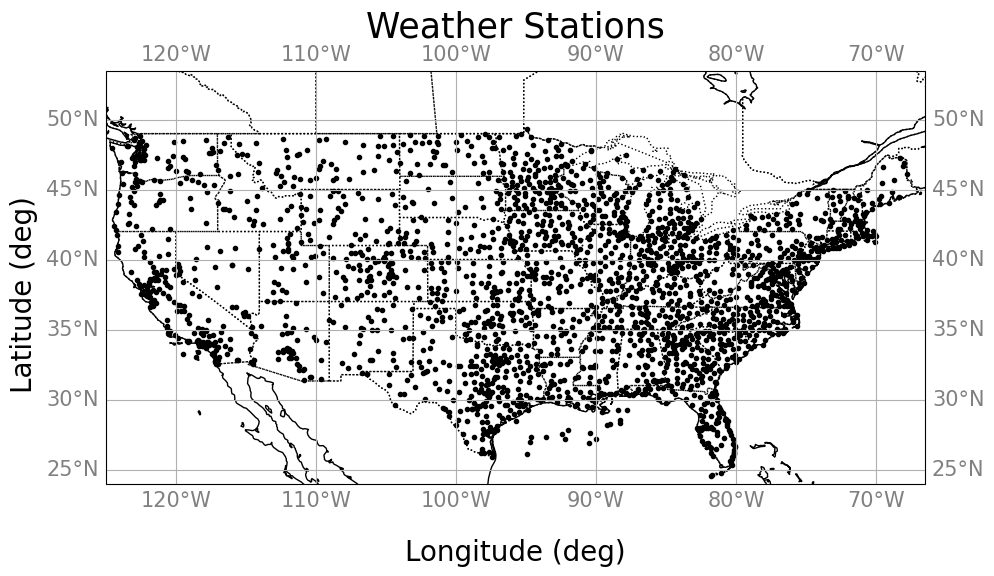

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=[10, 10])
pltr.plot_weather_stations(stations, ax = ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=[10, 10])
pltr.plot_weather_stations(stations, ax = ax, sigma_circles = True)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},
                       figsize=[8, 4])
temp = pltr.plot_interpolated_scalar(all_stations_data, 'tmpf', 1672487760.0, 0, ax = ax, fig = fig)
fig.tight_layout()

In [50]:
all_stations_data

,timestamp,station,valid,lon,lat,tmpf,relh,drct,sknt,p01i,...,smps_N,tmpc,elevation,sigma,tmpf_model,sknt_E_model,sknt_N_model,tmpf_sea_level,sknt_E_sea_level,sknt_N_sea_level
0,1672444800,PIL,2022-12-31 00:00,-97.3378,26.1597,66.0,96.240000,20.0,5.0,0.0,...,2.417096,18.888889,6.0,59730.110112,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12ba...,<src.models.weather.WindModel object at 0x12ba...,66.0702,1.590101,1.590101
1,1672445100,PIL,2022-12-31 00:05,-97.3378,26.1597,66.0,96.240000,20.0,5.0,0.0,...,2.417096,18.888889,6.0,59730.110112,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12a4...,<src.models.weather.WindModel object at 0x12ba...,66.0702,1.590101,1.590101
2,1672445400,PIL,2022-12-31 00:10,-97.3378,26.1597,66.0,96.240000,50.0,4.0,0.0,...,1.322713,18.888889,6.0,59730.110112,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12ba...,<src.models.weather.WindModel object at 0x12ba...,66.0702,2.944178,2.944178
3,1672445700,PIL,2022-12-31 00:15,-97.3378,26.1597,66.0,96.240000,40.0,5.0,0.0,...,1.970435,18.888889,6.0,59730.110112,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12ba...,<src.models.weather.WindModel object at 0x12ba...,66.0702,3.093938,3.093938
4,1672446000,PIL,2022-12-31 00:20,-97.3378,26.1597,66.0,96.240000,60.0,4.0,0.0,...,1.028888,18.888889,6.0,59730.110112,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12ba...,<src.models.weather.WindModel object at 0x12ba...,66.0702,3.344102,3.344102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,1672530000,DWH,2022-12-31 23:40,-95.5562,30.0680,69.3,49.771333,180.0,4.0,0.0,...,-2.057776,20.722222,46.0,38457.125315,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12ba...,<src.models.weather.WindModel object at 0x12ba...,69.8382,-0.920000,-0.920000
1936,1672530300,DWH,2022-12-31 23:45,-95.5562,30.0680,68.8,50.824667,180.0,4.0,0.0,...,-2.057776,20.444444,46.0,38457.125315,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12ba...,<src.models.weather.WindModel object at 0x12ba...,69.3382,-0.920000,-0.920000
1937,1672530600,DWH,2022-12-31 23:50,-95.5562,30.0680,68.3,51.878000,190.0,4.0,0.0,...,-2.026514,20.166667,46.0,38457.125315,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12ba...,<src.models.weather.WindModel object at 0x12ba...,68.8382,-1.614593,-1.614593
1938,1672530780,DWH,2022-12-31 23:53,-95.5562,30.0680,68.0,52.510000,190.0,4.0,0.0,...,-2.026514,20.000000,46.0,38457.125315,<src.models.weather.TemperatureModel object at...,<src.models.weather.WindModel object at 0x12ba...,<src.models.weather.WindModel object at 0x12ba...,68.5382,-1.614593,-1.614593


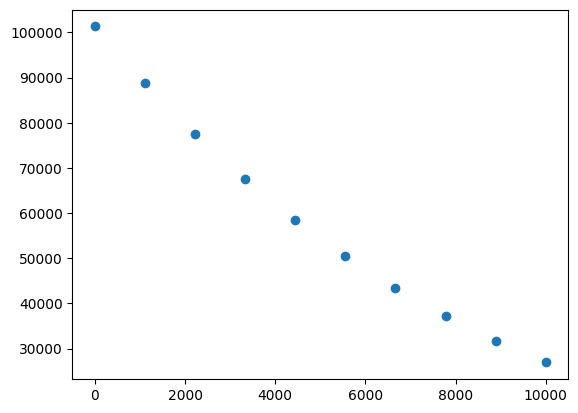

In [49]:
x = np.linspace(0, 10000, 10)
y = f(x)
plt.scatter(x, y)

In [67]:
all_stations_data[['skyc1', 'skyc2', 'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4']]
np.unique(all_stations_data['skyc1'])

,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4
0,0.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,500.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1935,0.0,NaN,NaN,NaN,400.0,1300.0,2400.0,NaN
1936,0.0,NaN,NaN,NaN,400.0,1300.0,2400.0,NaN
1937,0.0,NaN,NaN,NaN,400.0,1300.0,2400.0,NaN
1938,0.0,NaN,NaN,NaN,400.0,1300.0,2400.0,NaN


In [64]:
# Define a function to convert sky condition to a numeric scale
def sky_condition_to_numeric(condition):
    mapping = {
        'CLR': 0.0,
        'FEW': 0.2,
        'SCT': 0.4,
        'BKN': 0.6,
        'OVC': 0.8,
        'VV': 1.0
    }
    # Return the numeric value corresponding to the condition, NaN if not found
    return mapping.get(condition, np.nan)
for i in range(1, 5):  # Assuming there are 4 skycX columns
    all_stations_data[f'skyc{i}'] = all_stations_data[f'skyc{i}'].apply(sky_condition_to_numeric)
